In [7]:
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import SPSA, ADAM
import numpy as np
import matplotlib.pyplot as plt

from gates import pauli_x_gate, pauli_z_gate

In [8]:
num_qubits = 2
ansatz = TwoLocal(num_qubits, 'ry', 'cz')
optimizer = SPSA(maxiter=100)

In [9]:
estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer)

/var/folders/bz/2yy_dd616hj8hnqs8y5spz300000gn/T/ipykernel_3703/2449948782.py:1: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


In [10]:
# Construct matrix
X = pauli_x_gate()
Z = pauli_z_gate()

Hx = 2.0
Hz = 3.0
H0_diagonal = [0.0, 2.5, 6.5, 7.0]

H0 = np.diag(H0_diagonal)
HI = Hx * np.kron(X, X) + Hz * np.kron(Z, Z)


0.006609115621283079
0.030415637299352205
0.059802662492203895
0.09773624615579263
0.11926617917295934
0.14859569619927782
0.17811003432032085
0.20723053809331332
0.2365536395491592
0.26554672265076346
0.29439681956370106
0.3232280338828799
0.35214491217890564
0.38083827700607864
0.4098080918877818
0.43774786554341333
0.46542011395470584
0.49365498384504075
0.5738462280491563
0.5504477469669733
0.6324034854574073
0.6186264019833416
0.6328219844424658
0.6623290504217174
0.6882755974826698
0.7149583780346964
0.7435028181179666
0.7690643713339713
0.9864146782905839
0.8225366332426511
0.8489905872658096
0.8763370896816838
0.9382158046143673
0.9380753629040557
0.9555814824590994
0.9877420049036532
1.279703330148802
1.0635504120403145
1.0646999654603753
1.0842147411275749
1.1268606038870388
1.1256357749705255
1.0800283870853162
1.0362502052001235
0.9960780039009788
1.072487273947728
1.010318916064459
1.2854484118911302
1.309849684492487
0.814307125153318
0.7646551923286911
0.7697169925711511

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-1.3268595080942913


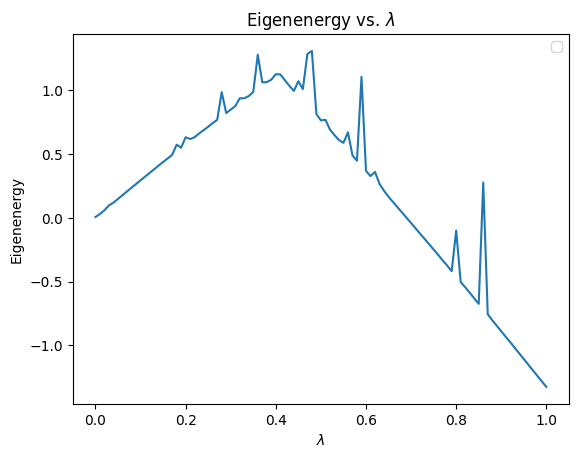

In [11]:
def problem_e() -> None:
    lambdas = np.linspace(0, 1, 101)

    lower_eig = []
    upper_eig = []

    for lmbda in lambdas:
        H2_op = SparsePauliOp.from_operator(H0 + lmbda*HI)

        minresult = vqe.compute_minimum_eigenvalue(H2_op)
        lower_eig.append(minresult.eigenvalue)
        print(minresult.eigenvalue)
     

    plt.plot(lambdas, lower_eig)
    plt.title("Eigenenergy vs. $\lambda$")
    plt.xlabel(r"$\lambda$")
    plt.ylabel("Eigenenergy")
    plt.legend()
    plt.savefig("images/problem_e.png")
    plt.show()

problem_e()